In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import load_model

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.10.1
2.10.0


In [3]:
class UNetModels:
    model_v1 = None
    model_v2 = None
    model_v3 = None
    model_v4 = None
    model_v5 = None
    model_v6 = None
    
    def load(trainVersion):
        
        if (trainVersion == 6):
            #v4 384
            #f = "cells-s256-e1000-v1-tf241-comborda-V3.h5"
            f = "v6-cells-s384-e1500-v1-tf241-20h.h5"
            if (UNetModels.model_v6 == None):
                print("Carrega "+f)
                UNetModels.model_v6 = UNetModels.__load(f)
            else:
                print("Usando "+f)
            return UNetModels.model_v6
        elif (trainVersion == 5):
            #v4 384
            #f = "cells-s256-e1000-v1-tf241-comborda-V3.h5"
            f = "v5-unet2-s384-e1500-v1-tf241-softmax-47h.h5"
            if (UNetModels.model_v5 == None):
                print("Carrega "+f)
                UNetModels.model_v5 = UNetModels.__load(f)
            else:
                print("Usando "+f)
            return UNetModels.model_v5
        elif (trainVersion == 4):
            #v4 416
            #f = "cells-s256-e1000-v1-tf241-comborda-V3.h5"
            f = "v4-unet2-s416-e1500-v1-tf241-softmax-54h.h5"
            if (UNetModels.model_v4 == None):
                print("Carrega "+f)
                UNetModels.model_v4 = UNetModels.__load(f)
            else:
                print("Usando "+f)
            return UNetModels.model_v4
        elif (trainVersion == 3):
            #v3 256
            #f = "cells-s256-e1000-v1-tf241-comborda-V3.h5"
            f = "v3-unet2-s256-e1500-v1-tf241-softmax-21.30h.h5"
            if (UNetModels.model_v3 == None):
                print("Carrega "+f)
                UNetModels.model_v3 = UNetModels.__load(f)
            else:
                print("Usando "+f)
            return UNetModels.model_v3
        elif (trainVersion == 2):
            #v2 416
            #f = "unet2-s512-e1000-v1-tf241-V2.h5"
            f = "v2-cells-s416-e1500-v1-tf241-20h.h5"
            if (UNetModels.model_v2 == None):
                print("Carrega "+f)
                UNetModels.model_v2 = UNetModels.__load(f)
            else:
                print("Usando "+f)
            return UNetModels.model_v2
        else:
            #v1
            #f = "cells-256-1000-30-V1.h5"
            f = "v1-cells-s256-e3000-v1-tf241-24h.h5"
            if (UNetModels.model_v1 == None):
                print("Carrega "+f)
                UNetModels.model_v1 = UNetModels.__load(f)
            else:
                print("Usando "+f)
            return UNetModels.model_v1
            
    
    def __load(h5):
        if os.path.isfile("./unet/%s" % h5):
            return load_model("./unet/%s" % h5)#load_model("cells-500b.h5");
        else:
            return load_model("./segmentation_methods/unet/%s" % h5)#load_model("cells-500b.h5");
    

Carrega v1-cells-s256-e3000-v1-tf241-24h.h5
1/1 [==============================] - 1s 884ms/step


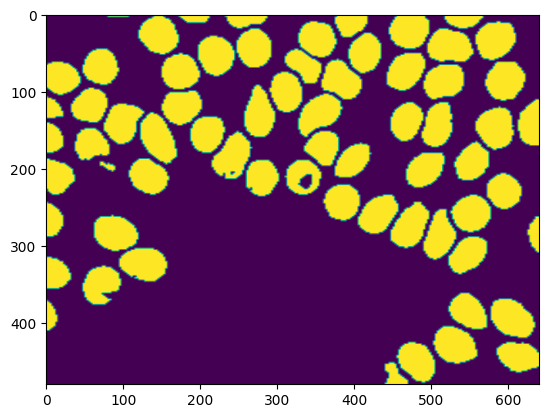

In [6]:
class UNetPredict:
    image_size = 256
    trainVersion = None
    
    def __init__(self,trainVersion=1):
        self.trainVersion = trainVersion
        if trainVersion == 2 or trainVersion == 4:
            #self.image_size = 512
            self.image_size = 416
        if trainVersion == 5 or trainVersion == 6:
            self.image_size = 384
        self.model = UNetModels.load(trainVersion)

    def load_img_norm(self, image_path, image_size):
        
        if type(image_path) == str:
            image = cv2.imread(image_path, 1); #reading image to image vaiable
        else:
            image = image_path
        image = cv2.resize(image, (self.image_size, self.image_size));
        #image normalisation
        image = image / 255.0;

        image_r = []
        image_r.append(image);
        image_r = np.array(image_r);
        return image_r;
        
    def predict(self, image_path):
        p_image = self.load_img_norm(image_path,self.image_size)
        
        result_mask = self.model.predict(p_image)
        if self.trainVersion == 1 or self.trainVersion == 2 or self.trainVersion == 6:
            #SEM BORDA
            result_mask = result_mask > 0.50; #float probability to bool conversion
            res = np.reshape(result_mask[0]*255, (self.image_size, self.image_size))
            pred_mask = np.array(res, dtype='uint8')
        else:
            #COM BORDA
            #converte para 0, 1 e 2
            pred_mask = tf.argmax(result_mask, axis=-1)
            pred_mask = pred_mask[..., tf.newaxis]
            pred_mask = pred_mask[0]

            #remove a classe 1 que sao as bordas
            pred_mask = np.array(pred_mask, dtype='uint8')
            pred_mask[pred_mask == 1] = 0
        
        return cv2.resize(pred_mask, (640,480), interpolation=cv2.INTER_LINEAR)

if __name__ == "__main__":
    unet = UNetPredict(trainVersion=1)
    mask = unet.predict("../blood_samples/samples/blood_smear_3.JPG")

    plt.imshow(mask)
    plt.show()

Carrega v2-cells-s416-e1500-v1-tf241-20h.h5
1/1 [==============================] - 1s 1s/step


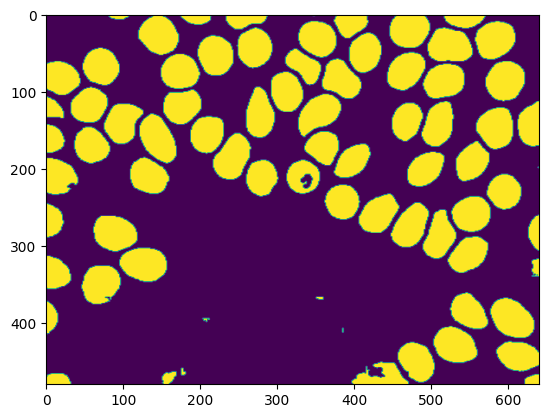

In [7]:
if __name__ == "__main__":
    unet = UNetPredict(trainVersion=2)
    mask = unet.predict("../blood_samples/samples/blood_smear_3.JPG")

    plt.imshow(mask)
    plt.show()

Carrega v3-unet2-s256-e1500-v1-tf241-softmax-21.30h.h5
1/1 [==============================] - 2s 2s/step


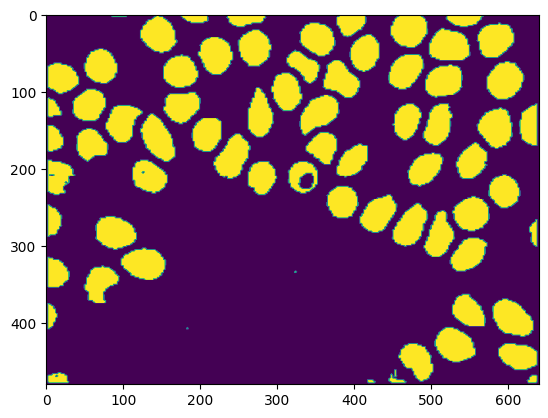

In [8]:
if __name__ == "__main__":
    unet = UNetPredict(trainVersion=3)
    mask = unet.predict("../blood_samples/samples/blood_smear_3.JPG")

    plt.imshow(mask)
    plt.show()

Carrega v4-unet2-s416-e1500-v1-tf241-softmax-54h.h5
1/1 [==============================] - 3s 3s/step


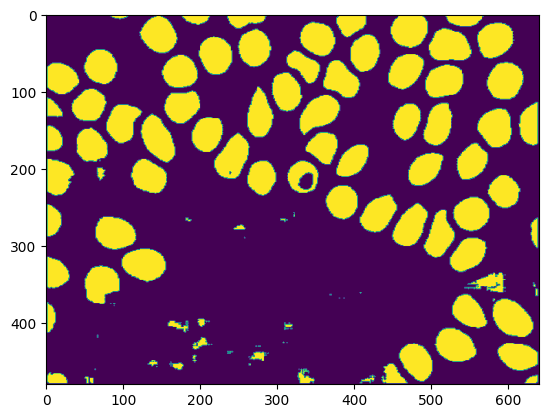

In [9]:
if __name__ == "__main__":
    unet = UNetPredict(trainVersion=4)
    mask = unet.predict("../blood_samples/samples/blood_smear_3.JPG")

    plt.imshow(mask)
    plt.show()

Usando v5-unet2-s384-e1500-v1-tf241-softmax-47h.h5
1/1 [==============================] - 0s 19ms/step


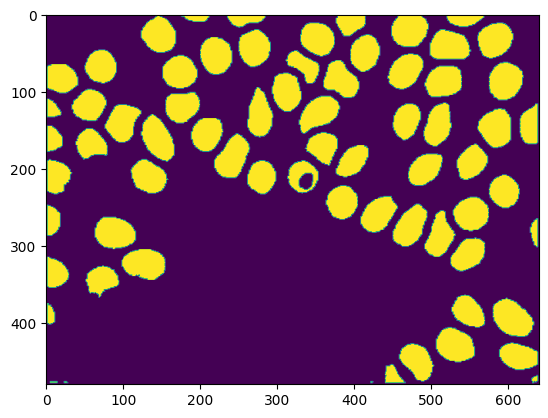

In [10]:
if __name__ == "__main__":
    unet = UNetPredict(trainVersion=5)
    mask = unet.predict("../blood_samples/samples/blood_smear_3.JPG")

    plt.imshow(mask)
    plt.show()

Usando v6-cells-s384-e1500-v1-tf241-20h.h5
1/1 [==============================] - 0s 18ms/step


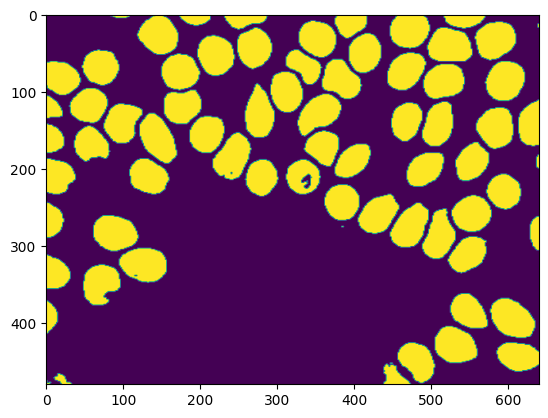

In [11]:
if __name__ == "__main__":
    unet = UNetPredict(trainVersion=6)
    mask = unet.predict("../blood_samples/samples/blood_smear_3.JPG")

    plt.imshow(mask)
    plt.show()